<img style="float:right;width:100px" src="https://enib.fr/images/logo-enib-accueil.jpg">
<div><h3>Cours de méthodes numériques S5, automne 2020</h3>
      
</div>
<div style="text-align:center;padding-bottom:20px;padding-top:10px">
    <h1> CTD du 02 novembre 2020</h1>
    <h1> A-stabilité d'une méthode </h1>
</div>
    

In [36]:
#Evite d'utiliser show :
%matplotlib inline 
#les bons modules :
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact
import scipy.optimize as opt
#On centre les figures :
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")
#On change la taille des figures
plt.rcParams['figure.figsize'] = [14, 9]

# 1. Rappels : équations-test, A-stabilité, rayon de stabilité...

## 1.1 l'équation-test


<font color="red"> On appelle équation-test l'équation
$$
y'(t)=-\lambda y(t),~\lambda>0
$$
</font>
Avec la condition initiale $y(0)=y_0$, la solution exacte est 
$$
z(t)=y_0\exp(-\lambda t)
$$
dont la courbe présente un "virage" d'autant plus serré que $\lambda$ est grand, et qui est telle que $\lim_{t\to\infty}z(t)=0$.

<font color="orange"> Cette équation va servir de banc d'essai pour étudier la capacité d'une méthode à "encaisser" des variations brutales de la solution d'une équation différentielle. Elle va servir aussi à déterminer un rayon de stabilité, qui sera utile pour toutes les équations, pas seulement pour l'équation-test.</font>

## 1.2 A-stabilité et rayon de stabilité

<font color="red">**Méthode A-stable ou absolument stable**</font>

Une méthode est dite $A$-stable si$\bullet\bullet\bullet$

<font color="red">**Rayon de stabilité**</font>

$\bullet\bullet\bullet$


## 1.3 Exemples


On va tester Euler, RK2 et Euler implicite sur cette équation, et voir les seuils d'instabilité pour le pas. 

$\bullet$ **On commence par Euler** : on a $f(t,u)=-\lambda u$
Euler donne
$$
y_{n+1}=y_n+h_n(-\lambda y_n)
$$
On prend un pas fixe $h$, et on obtient
$$
y_{n+1}=(1-\lambda h)y_n
$$
On a une suite géométrique, et donc
$$
y_n=(1-\lambda h)^ny_0
$$
<font color="orange">
Au passage on peut calculer l'erreur exacte :
$$
E_n=z(t_n)-y_n
$$
Exprimons $E_n$ en fonction de $h$ et $n$... On a $t_0=0$ et $t_n=nh$
$$
E_n=y_0\Big( e^{-\lambda nh}-(1-\lambda h)^n\Big)
$$
D'où
$$
E_n=y_0\Big(1-\lambda nh+\frac{\lambda^2h^2n^2}{2}-1+\lambda nh-\frac{n(n-1)}{2}\lambda^2h^2+\mathcal{O}((\lambda nh)^3\Big)
$$
Les termes d'ordre 0 et 1 disparaissent et il reste
$$
E_n=y_0\Big(n\frac{\lambda^2h^2}{2}+\mathcal{O}((\lambda nh)^3\Big)
$$
Si bien que $E_n=\mathcal{O}(h)^2$. Pourtant la méthode d'Euler est d'ordre 1, on devrait avoir un $\mathcal{O}(h)$ ! Sauf qu'ici on a une équation particulière, avec une solution qui a une asymptote horizontale $y=0$, ce qui atténue les erreurs...

</font>


Revenons à la stabilité

On a $\lim_{t\to +\infty}z(t)=0$, donc
$$
\lim_{n\to +\infty}z(t_n)=0
$$
On va accepter un erreur grossière au niveau du virage mais on veut que ça se stabilise ensuite : on veut donc que **sur l'équation-test** la valeur $y_n$ tende vers 0 quand $n\to \infty$
$$
y_n=(1-\lambda h)^ny_0\to_{n\to\infty} 0\iff |1-\lambda h|<1
$$
ça donne
$$
-1<1-\lambda h<1\iff 0<2-\lambda h<2
$$
L'inégalité de droite est vérifiée car $\lambda$ et $h$ sont positifs, et celle de gauche donne 
$$
h<\frac{2}{\lambda}
$$
C'est une valeur-seuil pour $h$, au-delà de laquelle on perd le contrôle...

<font color="red">
**La méthode d'Euler n'est pas A-stable : son rayon de stabilité vaut 2.**
</font>

Remarque : si $1-\lambda h$ est $<0$ ($h>1/\lambda$), $y_n$ change de signe selon la parité de $n$

$\bullet$  **on fait la même chose avec la méthode RK2** : on l'applique à l'équation-test... avec un pas fixe :

$$
y_{n+1}=y_n+hf(t_n+h/2,y_n+h/2f(t_n,y_n))
$$
Ici $f(a,b)=-\lambda b$ donc
$$
\begin{array}{rcl}
y_{n+1}&=&y_n+h(-\lambda(y_n+h/2f(t_n,y_n))\\
&=&y_n+h(-\lambda(y_n+h/2(-\lambda y_n)))\\
&=&(1-\lambda h+\frac{\lambda^2h^2}{2})y_n
\end{array}
$$
Encore une fois on a une suite géométrique, et $y_n$ tend vers 0 quand $n\to\infty$ ssi $$|1-\lambda h+\frac{\lambda^2h^2}{2}|<1$$
On pose $x=\lambda h$ (positif ici), on doit étudier les conditions
$-1<1-x+x^2/2$ ET $1-x+x^2/2<1$

-La première condition est $x^2-2x+4>0$, ce qui est tjrs vrai (discriminant négatif et coeff de $x^2$ positif).

-La deuxième condition est $x^2-2x<0\iff x(x-2)<0$. Comme $x$ est positif, la seule possibilité est $x-2<0$.

Au final, l'intersection de toutes ces contraintes est $\lambda h<2$, c'est-à-dire :

$$h<2/\lambda$$

<font color="red">RK2 a le même rayon de stabilité qu'Euler. Attention, elle est d'ordre 2 donc plus précise qu'Euler mais la précision concerne ce qui se passe quand $h\to 0$. Ici on fait grandir le pas, donc ce n'est plus le même problème...</font>

$\bullet$  **on fait la même chose avec Euler implicite**

Sur l'équation-test $y'=-\lambda y$ on obtient
$$
y_{n+1}=y_n+h(-\lambda y_{n+1})
$$
ce qui donne
$$
(1+\lambda h)y_{n+1}=y_n
$$
donc
$$
y_{n+1}=\frac{1}{1+\lambda h}y_n
$$
Suite géométrique, donc
$$
y_n=\Big(\frac{1}{1+\lambda h}\big)^ny_0
$$
On a $y_n\to 0 \iff -1<\frac{1}{1+\lambda h}<1$
L'inégalité de droite est vérifiée puisque $\lambda h>0$, et celle de gauche est vérifiée évidemment puisque la raison est positive !

Il n'y a donc **pas de contrainte sur $h$** pour avoir $y_n\to 0$ ! <font color="red">Euler implicite est A-stable.</font>



## 1.4 Exercice
Etudier la stabilité absolue de la méthode suivante.
$$
\mathbf{y_{n+1}=y_n+\frac{h_n}{5}\left(4f(t_n,y_n)+f(t_{n+1},y_{n+1})\right)}
$$

$$
\mathbf{y_{n+1}=y_n+\frac{h_n}{5}\left(-4\lambda y_n-\lambda y_{n+1}\right)}
$$

$$
\mathbf{(1+\frac{\lambda h_n}{5})y_{n+1}=y_n(1-\frac{4h_n}{5}\lambda)}
$$

$$
\mathbf{y_{n+1}=y_n\frac{5-4\lambda h_n}{5+\lambda h_n}}
$$

**Correction**
$\bullet\bullet\bullet$

## 1.5. Vérification pratique

Je teste ci-dessous différentes valeurs du pas : on prend une équation-test avec $\lambda=100$, ce qui nous donne pour Euler et RK2 le seuil $h<2/100$... pour des petites valeurs de $h$ on voit bien que RK2 est plus précise qu'euler implicite, mais quand le pas devient trop grand les courbes se "croisent" et on finit par perdre le contrôle pour RK2, pas pour Euler implicite... 

On vérifie aussi les résultats obtenus dans l'exercice ci-dessus

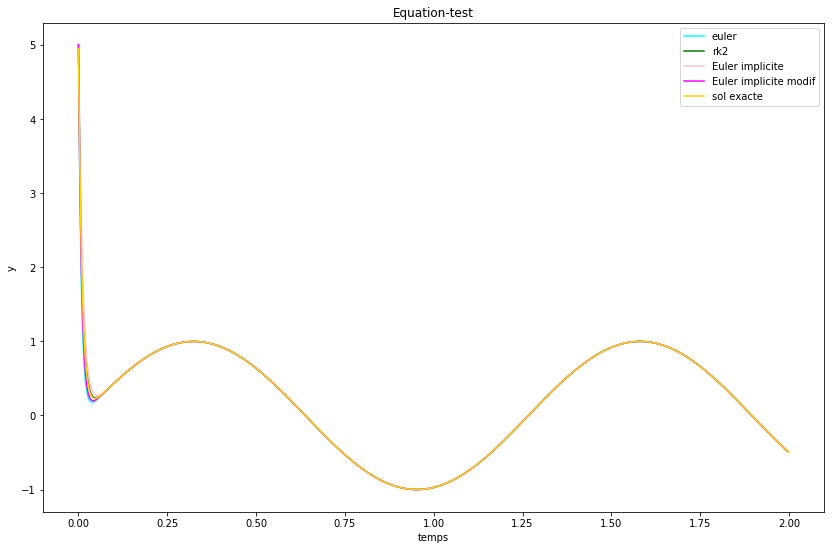

In [37]:
def euler(f,u0,t):
    M=np.zeros((len(t),len(u0)))
    #matrice avec que des zéros, qu'on va modifier ensuite
    M[0,:]=u0 
    h=np.zeros(len(t)-1)
    #on fait ensuite une boucle sur les lignes :
    for i in range(len(t)-1): 
        h[i]=t[i+1]-t[i]
        M[i+1,:]=M[i,:]+h[i]*f(M[i,:],t[i])
    return M

def rk2(f,u0,t):
    h=t[1]-t[0]
    M=np.zeros((len(t),len(u0)))
    M[0,:]=u0 
    for i in range(len(t)-1): 
        A=M[i,:]+h/2*f(M[i,:],t[i])
        M[i+1,:]=M[i,:]+h*f(A,t[i]+h/2)
    return M

    
def euler_implicite(f,u0,t):
    h=t[1]-t[0]
    M=np.zeros((len(t),len(u0)))
    M[0,:]=u0 
    for i in range(len(t)-1): 
        def F_i(x):
            return x-M[i,:]-h*f(x,t[i+1])
        M[i+1,:]=opt.broyden1(F_i,M[i,:])
        #je résous F_i(x)=0 en partant de M[i,:], en espérant que ça tombe sur "la bonne" solution M[i+1,:]
    return M
    
def euler_implicite_modif(f,u0,t):
    h=t[1]-t[0]
    M=np.zeros((len(t),len(u0)))
    M[0,:]=u0 
    for i in range(len(t)-1): 
        def F_i(x):
            return x-M[i,:]-h/5*(4*f(M[i,:],t[i])+f(x,t[i+1]))
        M[i+1,:]=opt.broyden1(F_i,M[i,:])
        #je résous F_i(x)=0 en partant de M[i,:], en espérant que ça tombe sur "la bonne" solution M[i+1,:]
    return M

def test(u,t):
        return -100*u +100*np.sin(5*t)
y0=[5]
t=np.arange(0,2,0.004)
s=np.arange(0,2,0.001)
yeuler=euler(test,y0,t)
yrk2=rk2(test,y0,t)
yeuler_implicite=euler_implicite(test,y0,t)
yeuler_implicite_modif=euler_implicite_modif(test,y0,t)
plt.plot(t,yeuler,color="cyan",label="euler")
plt.plot(t,yrk2[:,0],color="green",label="rk2")
plt.plot(t,yeuler_implicite[:,0],color="pink",label="Euler implicite")
plt.plot(t,yeuler_implicite_modif[:,0],color="magenta",label="Euler implicite modif")
plt.plot(s,5*np.exp(-100*s)-100/2005*np.cos(5*s)+2000/2005*np.sin(5*s),color="gold",label="sol exacte")
plt.xlabel("temps")
plt.ylabel("y")
plt.legend()
plt.title("Equation-test");

# 2 Ok mais ça sert à quoi dans la vraie vie ?

<font color="red"> Pour l'instant ça sert pas à grand-chose notre truc car dans la vie résoudre juste l'équation-test c'est pas très utile ! 

A quoi sert le rayon de stabilité sur un pb quelconque ?</font>

## 2.1. Cas d'un système différentiel linéaire

soit $A$ une matrice carrée $n\times n$ et soit le problème de Cauchy
$$
Y'(t)=AY(t)+B(t)
$$
où $Y$ est le vecteur-colonne des fonctions inconnues $y_1(t),\dots,y_n(t)$ et $B(t)$ est un vecteur de $n$ fonctions connues. 

### Si toutes les valeurs propres de $A$ sont r\'eelles :
 
$\bullet\bullet\bullet$

### Sinon : c'est plus compliqué, cf poly
$\bullet\bullet\bullet$

### Exercice : 

Considérons le problème suivant :
$$
\left\{
\begin{array}{lr}
y'_1(t)=-53y_1(t)+47y_2(t)+\sin 2t,&~y_1(0)=2\\[10pt]
y'_2(t)=47y_1(t)-53y_2(t)-\cos 2t,&~y_2(0)=0.
\end{array}
\right.
$$
Déterminer le seuil à ne pas dépasser si l'on applique la méthode RK2 pour résoudre numériquement ce système. En déterminant la solution unique du problème, expliquer quelle est la fonction
impliquée dans cette solution qui 
induit le plus gros problème de stabilité absolue.

### Correction :

<font color="purple"> Exercice :
    On considère le problème de Cauchy
    
$$
\left\{
\begin{array}{l}
y_1'(t)=9y_1(t)+24y_2(t)+5\cos t-\frac{1}{3}\sin t\\
y_2'(t)=-24y_1(t)-51y_2(t)-9\cos t+\frac{1}{3}\sin t,~t\in[0;10]\\
y_1(0)=1/3;y_2(0)=4/3.
\end{array}
\right.
$$

1. Déterminer le seuil à ne pas dépasser lorqu'on applique la méthode RK4 sur ce problème. 

$\bullet$ Correction : 

$\bullet\bullet\bullet$


2. Même question avec la $\theta$-méthode définie par

$$
\mathbf{y_{n+1}=y_n+h_n\Big(\theta f(t_n,y_n)+(1-\theta)f(t_{n+1},y_{n+1})\Big)}
$$
où $\theta\in ]1/2;1]$. Commencer par trouver le rayon $R$ de cette méthode !

$\bullet$ Correction :
$\bullet\bullet\bullet$
</font>
 
## 2.2 Cas d'une équation différentielle quelconque



Soit le problème de Cauchy général à une équation
$$\left\{
\begin{array}{l}
y'(t)=f(t,y(t)),\quad t\in[t_0,t_0+T]\\
y(t_0)=y_0.
\end{array}
\right.
$$

**Ce n'est pas linéaire en général, donc on linéarise !**

$\bullet\bullet\bullet$


**Exemple**

Soit le problème
$$\left\{
\begin{array}{l}
y'(t)=-y(t)\cdot\frac{t+1}{t},\quad t\in[0.1,5]\\
y(0.1)=\frac{e^{\frac{1}{10}}}{10}.
\end{array}
\right.
$$

$\bullet\bullet\bullet$

### Exercice 

On considère le problème de Cauchy suivant :
\begin{equation}
\left\{
\begin{array}{l}
y'(t)=1-{\rm Arctan} (3y(t)),~t\ge 0\\
y(0)=4.
\end{array}
\right.
\label{1}
\end{equation}

Déterminer le seuil à ne pas dépasser pour le pas d'intégration, lorsqu'on applique une méthode de rayon de stabilité $R$


$\bullet\bullet\bullet$